# 분류와 예측모형

필요한 패키지와 라이브러리 설치하고 사용할 함수를 먼저 정의한다.

In [1]:
# 한글 폰트가 깨질 때 사용 - 런타임 메뉴에서 다시 시작 및 모두 실행 선택. (출처: https://teddylee777.github.io/colab/colab-korean)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

'sudo'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


'sudo'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


'rm'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [2]:
# pandas 라이브러리의 탐색적 데이터 분석 도구(explanatory data analysis tool, profiling)를 설치한다.
!pip install -U pandas-profiling

In [3]:
import numpy as np
import pandas as pd
import pandas_profiling

import matplotlib.pyplot as plt
import seaborn as sns

from itertools import product

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_24672\4252253312.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [4]:
from matplotlib import rc
%matplotlib inline

plt.rc('font', family='NanumBarunGothic') # clolab 에서 한글 사용 
plt.rcParams['axes.unicode_minus'] = False 
plt.rcParams["figure.figsize"] = (10,7)   # 그림 크기 조정

In [5]:
#기계학습 모형
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree

# 기계학습 평가 도구
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split



In [6]:
# 표준화 함수
def standarize(x):
  return (x - np.mean(x))/np.std(x)

## 분류 


앞 절에서는 반응변수 $y$ 가 연속형 변수인 경우 설명변수 $x$ 에 따라서 반응변수의 평균을 예측하는 선형 회귀 모형을 배웠다. 앞 절에서 배운 선형 회귀모형은 예측 모형 중에서 가장 단순한 모형이며 다음과 같은 경우로 확장할 수 있다.

- 설명변수가 2개 이상인 경우
- $E(y|x)$ 가 비선형(nonlinear) 인 경우 


이제 이 절에서는 반응변수가 연속형이 아닌 범주형 변수인 경우를 고려할 것이다. 반응 변수가 범주형인 경우 예측하는 경우를 우리는 **분류(classification)** 이라고 부른다. 이  절에서는 **2개의 가능한 경우를 가지는 범주형 변수, 즉 이항 변수(binary variable)을 예측** 하는 경우에 대하여 알아보고자 한다.

앞에서 가설 검정을 배울 때 강조한 것처럼 우리는 살아가면서 수많은 결정을 내린다. 대부분의 결정은 가능한 두 개의 선택 중에 하나를 선택하는 것이다. 여러분의 결정은 주어진 상황에 대하여  경험과 지식을 기반으로 이루어 진다. 즉, 인간은 배운 지식과 습득한 경험을 기반으로 결정을 내리는 것이다. 이러하 인간의 결정하는 절차를 데이터를 기반으로 하여 통계적 방법과 컴퓨터 알고리즘을 이용하여 구현하는 것은 **기계 학습(machine learning)** 또는 **인공 지능(artificial intelligence)** 라고 부른다. 최근에 활발하게 사용되는  딥러닝(deep learning)도 인간의 결정 과정을 더욱 정교하게 구현한 예측 방법이다.

이제 분류에 사용되는 기계학습 방법 중에 대표적인 몇 가지 예측 방법들의 개념과 구현 방법을 간단한 예제들을 통해서 알아보고자 한다. 




## 데이터의 구조와 전처리


### 예제: 잔디 제초 트랙터

여러분이 아파트가 아닌 마당이 있는 단독주택을 구입하고 싶디면 푸른 잔디가 있는 넓은 정원이 있는 것이 좋을 것이다. 하지만 여러분이 이런 넓은 정원이 있는 주택에 산다면 누군가는 정원을 돌봐야 하고 잔디를 주기적을 깍아주어야 한다.

미국의 한 기업은 앉아서 운전하는 잔디를 제초할 수 있는 트랙터(lawn mower)를 생산하고 있다. 넓은 대지를 가진 주택을 소유하고 있는 사람들이 제초 트랙터를 살 가능성이 높을 것이라는 것은 예상하기 쉽다. 또한 넓은 정원을 가진 사람들은 소득도 일반적으로 높을 것이라고 예상할 수 있다. 

이 기업의 마케팅 부서에서는 제초 트랙터를 살 가능성이 높은 사람들에게  홍보를 하려고 한다. 제품 홍보의 대상이 되는 사람들을 선택하기 위하여 실제 데이터를 수집하였다. 수집한 데이터는 다음과 같은 3개의 변수로 구성되어 있다.

- `lotsize`: 주택의 대지 변적 (단위: 1,000 square feet)
- `income` : 연소득 (단위: $1,000)
- `class` : 제초 트랙터의 보유 여부( 1=보유 , 2=미보유)

이제 데이터를 외부화일에서 읽어서 데이터프레임 `lawn_mower_0` 에 저장하자. 데이터프레임 `lawn_mower_0`는 모두 24개 레코드로 구성되어 있다.


In [7]:
url1 = "https://ilovedata.github.io/teaching/bigdata2/data/lawn-mower.txt"
lawn_mower_0 = pd.read_csv(url1, delim_whitespace=True)

In [8]:
lawn_mower_0

,income,lotsize,class
0,60.0,18.4,1
1,85.5,16.8,1
2,64.8,21.6,1
3,61.5,20.8,1
4,87.0,23.6,1
5,110.1,19.2,1
6,108.0,17.6,1
7,82.8,22.4,1
8,69.0,20.0,1
9,93.0,20.8,1


마케팅 부서의 목적은 무었인가? 만약 어떤 사람이 거주하는 주택의 대지 면적과 소득을 알았을 때 이 사람이 제초 트랙터를 구입할 가능성을 예측하고 싶은 것이다. 

구입할 가능성이 크다면 더 적극적인 방법으로 홍보를 할 것이다. 이렇게 고객들을 제초 트랙터를 구입할 가능성이 높은 사람과 낮은 사람으로 잘 분류할 수 있다면 회사는 효율적인 마케팅을 수행할 수 있다. 

아래 산점도는 데이터에서 주택의 대지 면적과 연소득에 대하여  제초 트랙터의 보유 여부를 나타낸 것이다.
예측한 대로 대지의 면적이 클수록, 그리도 연소득이 높을수록 제초 트랙터를 구입할 가능성이 높다.

만약 새로운 고객의 연소득이 `income=70` 이고  주택의대지 면적이 `lotsize=19`이라면 (아래 그림의 빨간점) 마케팅 직원은 이 고객을 어떻게 분류해야 하는가? 새로운 고객은 제초 트랙터를 구입할 가능성이 높은가?



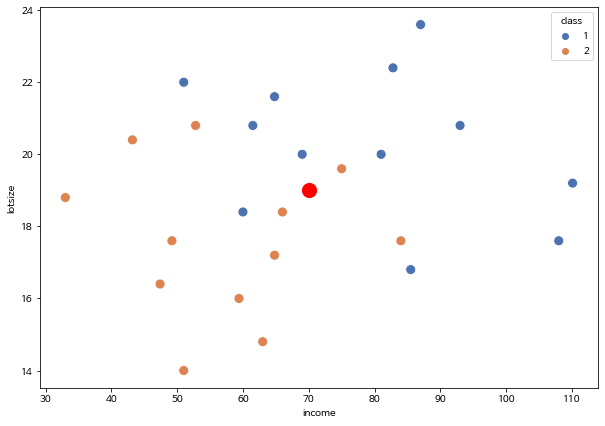

In [9]:
sns.scatterplot(data=lawn_mower_0, x= "income", y= "lotsize", hue="class", s=100, palette="deep")
plt.scatter(x=70, y=19, color='r', s=200)

### 데이터 전처리


분류에서는 일반적으로  2개의 가능한 선택을 성공(success)와 실패(failure)라고 구분한다. 

예를 들어서 고객이  제초 트랙터를 구입하는 사건을 성공, 구입하지 않으면 실패라고 할 수 있다. 성공과 실패는 문제에 따라서 적절하게 정의한다.

반응변수 $y$를 다음과 같이 성공이면 1, 실패면 0으로 정의하자. 이렇게 2개의 가능한 범주를 가지는 변수를 이항변수(binary variable)라고부른다.

$$
\begin{equation}
y = \begin{cases}
0 & \text{ if failure }\\
1 & \text{ if success} 
\end{cases}
\end{equation}
$$

이제 데이터프레임에서  위에서 정의한 대로 반응변수의 값을 성공과 실패에 따라서 1과 0으로 바꾼다.

 기계학습 방법을 사용하는 경우 데이터에서 반응변수의 값을 0과 1로 코딩하는 것이 일반적이고 통상적이 절차이다. 우리가 사용하는  라이브러리 `SKlearn` 도 이러한 규칙을 따른다. 
 
또한 연속형 설명변수들은 모두 표준화 하는 것이 여러 가지 예측 모형을 적용할 때 필요하다. 

기계학습 모형을 사용하고자 할 때 다음과 같은 전처리를 반드시 해주는 것이 좋다.

- **반응변수를 0 과 1로 코딩한다.**
- **연속형 설명변수는 표준화한다.**

또한 앞에서 언급한 새로운 고객의 연소득과 대지 면적을 대이터프레임 `lawn_mower`에 추가하자.  새로운 고객의 제품 구입의 여부는 알 수 없고 예측해야 하는 목표이다. 따라서 구입 여부는 결측값(missing) `np.NaN` 으로 입력한다. 


이제 데이터프레임 `lawn_mower` 의 변수들을 표준화하고 재코딩하자. 반응변수의 열이름을 `buy`로 변환한다.  

In [10]:
# 새로운 고객 자료
new_customer = pd.DataFrame({'income':[70], 'lotsize':[19], 'class': [np.NaN]})
# 조사한 데이터프레임에 새로운 고객자료 추가
lawn_mower_0 = lawn_mower_0.append( new_customer).reset_index(drop=True)
lawn_mower_0

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_24672\1464936591.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lawn_mower_0 = lawn_mower_0.append( new_customer).reset_index(drop=True)


,income,lotsize,class
0,60.0,18.4,1.0
1,85.5,16.8,1.0
2,64.8,21.6,1.0
3,61.5,20.8,1.0
4,87.0,23.6,1.0
5,110.1,19.2,1.0
6,108.0,17.6,1.0
7,82.8,22.4,1.0
8,69.0,20.0,1.0
9,93.0,20.8,1.0


In [11]:
# 데이터프레임 복사본 생성
lawn_mower = lawn_mower_0
# 새로운 반응변수 buy 를 정의 (0과 1)
lawn_mower['buy'] = 2- lawn_mower['class']
# 원래 반응변수 열 class 삭제
lawn_mower.drop(columns=['class'], inplace=True)
# 독립변수 표준화
lawn_mower['income'] = standarize(lawn_mower.income)
lawn_mower['lotsize'] = standarize(lawn_mower.lotsize)

lawn_mower

,income,lotsize,buy
0,-0.447666,-0.236997,1.0
1,0.895331,-0.923946,1.0
2,-0.194866,1.136900,1.0
3,-0.368666,0.793426,1.0
4,0.974331,1.995586,1.0
5,2.190928,0.106477,1.0
6,2.080329,-0.580472,1.0
7,0.753132,1.480374,1.0
8,0.026333,0.449951,1.0
9,1.290330,0.793426,1.0


### 학습과 예측 데이터의 분리

위에서 만든 데이타프레임 `lwan_mower` 에는 반응변수의 결과가 있는 자료와 새로 예측할 자료가 같이 포함되어 있다. 설면변수를 표준화를 하기 위하여  새로 예측할 자료를 원자료에 포람시켜 준 것이다.

우리는 이제 반응변수의 결과가 있는 원래 자료를 이용하여  예측 모형을 학습시킬 것이다.  **반응변수의 결과가 포함된 자료를 학습 데이터(training data) 라고 한다.** 

또한 우리가 예측하고자 하는 새로운 고객에 대한 자료는 반응변수의 값이 없는 데이터이다. **이렇게 예측을 하려고 하는 데이터를 검증 데이터(test data, validation data)** 라고 한다.

학습데이터와 검증 데이터를 분리한 후 설명변수와 반응변수를 다시 분리하여 `numpy` 행렬 형식으로 저장해야 한다.

이제 다음과 같이 학습 데이터와 검증 데이터를  설명변수와 반응변수로 나누어 저장하자.

- `X_train`: 학습 데이터의 셜명변수 값이 포함된 `numpy` 행렬
- `y_train`: 학습 데이터의 반응변수 값이 포함된 `numpy` 행렬
- `X_predict`: 검증 데이터의 셜명변수 값이 포함된 `numpy` 행렬

아래 코드에서 `isnull()` 은 결측값이 존재하는지 확인하는 메소드이다. 결측값이 있는 경우 `True`, 아니면 `False` 를 생성한다. 

In [12]:
 lawn_mower.buy.isnull()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24     True
Name: buy, dtype: bool

In [13]:
# 학습데이터 - 설명변수
X_train = np.array(lawn_mower.loc[~lawn_mower.buy.isnull() ].drop(columns='buy'))
# 학습데이터 - 반응변수
y_train = np.array(lawn_mower.loc[~lawn_mower.buy.isnull(), 'buy'])
# 예측데이터 - 설명변수
X_predict = np.array(lawn_mower.loc[lawn_mower.buy.isnull() ].drop(columns='buy'))

y_train

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

## 로지스틱 회귀모형


이제 잔디 제초 트랙터 데이터를 이용하여 분류를 수행하는 검증모형을 만들려고 한다.

여러분이 아래 산점도에 주어진 데이터를 보고 새로운 고객(`income=70`, `lotsize=19`) 을 어떻게 분류하겠는가?

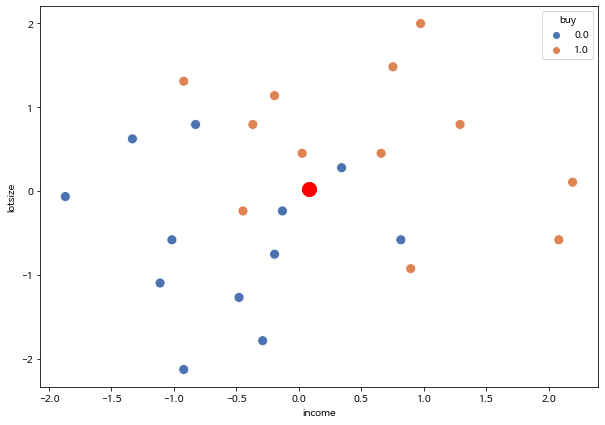

In [14]:
sns.scatterplot(data=lawn_mower, x= "income", y= "lotsize", hue="buy", s=100, palette="deep")
plt.scatter(x=0.079000, y=0.020608, color='r', s=200)

### 로지스틱 회귀모형의 정의

여러분은 위의 산점도에서  연소득이 많아질수록 그리고 주택의 대지 면적이 증가할수록 제초 트랙터를 구입할 가능성이 높아짐을 알 수 있다. 

우리는 앞에서 임의의 사건이 일어날 가능성을 확률로 수치화하는 것을 배웠다. 이러한 개념을 적용하면 
다음과 같이 데이터의 산점도가 주는 정보를 요약할 수 있다.


- **연소득이 많아질수록 그리고 주택의 대지 면적이 증가할수록 제초 트랙터를 구입할 확률이 높아진다**

연소득을 $x_1$,주택의 대지 면적을 $x_2$ 라고 하고 제초 트랙터를 구입하는 사건(성공)을 $y=1$ 이라고 하면 위의 문구를 다음과 같은 관계식으로 나타낼 수 있다.

$$ P(y=1 | x_1, x_2 ) \propto x_1 \quad \text{and} \quad  P(y=1 | x_1, x_2 ) \propto x_2  $$

위의 관계를 다음과 같이 나타내는 기계학습 모형을 **로지스틱 회귀모형(logistic regression model)** 이라고 한다.

$$ 
\begin{align}
P(y=1 | x_1, x_2 )  & = \frac{ \exp(\beta_0 + \beta_1 x_1 + \beta_2 x_2)}{1+ \exp(\beta_0 + \beta_1 x_1 + \beta_2 x_2)}  \\ 
 & = \frac{1}{1+ \exp(-[\beta_0 + \beta_1 x_1 + \beta_2 x_2])}
\end{align}
$$

위의 회귀 모형식에서 만약에 회귀 계수(regression coefficient) $\beta_1$과 $\beta_2$ 가 양수이면 제초 트랙터를 구입히는 사건에 대한 확률은 연소득, 주택의 대지 면적과 비선형적으로 비례적관계를 가진다.


위에서 주어진 로지스틱 회귀모형에서 주어진 독립변수의 값 $x_1$ 과 $x_2$ 에서 계산된 성공의 확률 $P(y=1|x_1,x_2)$ 가 0.5 보다 크면 성공($\hat y=1$)이라고 예측하고 0.5보다 작으면 실패($\hat y=0$)라고 예측한다.  


- **만약 $P(y=1| x_1, x_2) > 0.5$ 이면 성공 $\hat y=1$ 으로 예측한다.**
- **만약 $P(y=1| x_1, x_2) < 0.5$ 이면 실패 $\hat y=0$ 로 예측한다.**


### 분류 경계선

로지스틱 회귀모형에서 추정된 확률 $P(y|x_1, x_2)$ 이 0.5 가 되는 독립변수들의 집합을 **분류 경계선 (Decision boundary)** 라고 부른다. 

$$ \text{Decision boundary} = \{ x_1, x_2 | P(y|x_1, x_2) = 0.5 \} $$

가장 간단한 예로 하나의 독립변수 $x_1$ 만 고려한 로지스틱 회귀모형은 다음과 같고 함수관계를 그리면 다음 그림과 같이 나타난다. 

$$ P(y=1 | x_1) = \frac{ \exp(\beta_0 + \beta_1 x_1 )}{1+ \exp(\beta_0 + \beta_1 x_1 )}  = \frac{ 1}{1+ \exp(-[\beta_0 + \beta_1 x_1] )}$$

아래 그림의 수평선은 확률이 0.5인 선이고 수직선이 바로 분류 경계선이다.

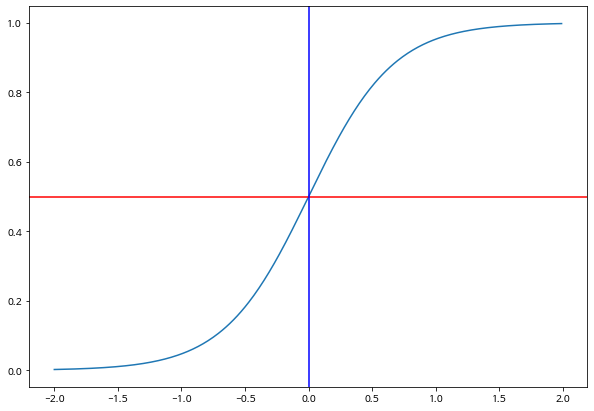

In [15]:
def logistic_curve(x, beta0, beta1):
  p = 1.0/(1.0+ np.exp(-beta0 -beta1*x)) 
  return p

xx = np.arange(-2,2,0.01)
b0 = 0.0
b1 = 3.0

plt.plot(xx, logistic_curve(xx,b0,b1) )
plt.axhline(y=0.5, color='r')
plt.axvline(x=0.0, color='b')
plt.show()

### 모형의 적합

이제 두 개의 독립변수와 반응변수의 값이 포함된 학습 데이터를 이용하여 로지스틱 회귀모형을 적합해보자. 

먼저 `SKlearn` 라이브러리의 `LogisticRegression()` 를 이용하여 로지스틱 회귀모형을 정의한다. 다음으로 `fit()` 메소드에  학습데이터 `X_train` 와  `y_train` 를 인자로 입력하여 모형의 계수
$\beta_0$, $\beta_1$, $\beta_2$ 를 추정한다.

추정의 결과는 `lawn_logistic_fit` 에 저장한다.

In [16]:
lawn_logistic_fit = LogisticRegression()
lawn_logistic_fit.fit(X_train, y_train)

LogisticRegression()

이제 계수의 추정값 $\hat \beta_0$, $\hat \beta_1$, $\hat \beta_2$ 를 구해보자.

- `intercept_[0]` 메소드: 절편의 추정값
- `coef_.T`: 기울기 계수의 추정값 벡터



In [17]:
# beta0
b0 = lawn_logistic_fit.intercept_[0]

# beta1, beta2 
b1, b2 = lawn_logistic_fit.coef_.T

b0,b1,b2

(-0.0067719747983076015, array([1.15076653]), array([1.18178588]))

이제 위에서 추정된 계수를 이용하여 성공 확률의 예측식을 다음과 같이 나타낼 수 있다. 


$$ 
\begin{align}
P(y=1 | x_1, x_2 )  & = \frac{ 1}
{1+ \exp(-[\beta_0 + \beta_1 x_1 + \beta_2 x_2] )} \\ 
& =  \frac{ 1}{1+ \exp[0.00678 - (1.1508) x_1 - (1.1818) x_2]} 
\end{align}
$$

또한 분류 경계선을 다음과 같이 나타낼 수 있다. 

$$  \frac{ 1}{1+ \exp[0.00678 - (1.1508) x_1 - (1.1818) x_2]}  = 0.5 $$


아래 그림에서 점선으로 나타난 분류 경계선의 위쪽 부분은 예측 확률 $E(y=1|x_1,x_2)$ 가 0.5 보다 크므로 성공($\hat y =1$)이라고 예측한다.
반대로  경계선의 아래쪽 부분은 예측 확률 $E(y=1|x_1,x_2)$ 가 0.5 보다 작으므로 실패라고 예측한다.



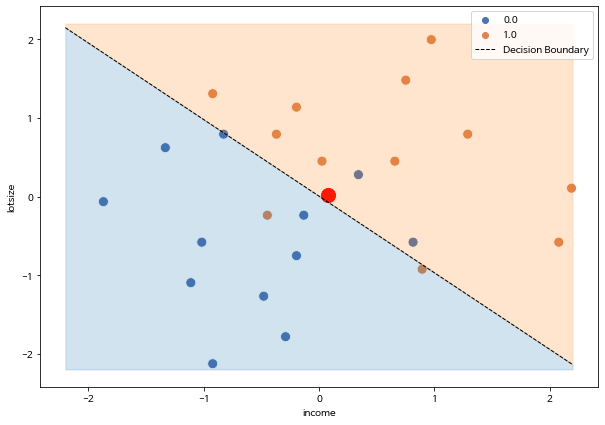

In [18]:
# 분류 경계선을의 절편과 기울기 계산
c = -b0/b2
m = -b1/b2

# 분류 경계선의 그래프 값을 계산
xmin, xmax = -2.2, 2.2
ymin, ymax = -2.2, 2.2
xd = np.array([xmin, xmax])
yd = m*xd + c

# 데이터의 산점도
sns.scatterplot(data=lawn_mower, x= "income", y= "lotsize", hue="buy", s=100, palette="deep")

# 새로운 고객
plt.scatter(x=0.079000, y=0.020608, color='r', s=200)

# 분류 경계선 그리기
plt.plot(xd, yd, 'k', lw=1, ls='--', label='Decision Boundary')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)
plt.legend()

### 분류를 위한 예측

이제 새로운 고객에 대한 예측을 수행해 보자. 새로운 고객의 연소득이 `income=70` 이고  주택의대지 면적이 `lotsize=19` 인 경우 아래 코드 `lawn_logistic_fit.predict(X_predict)` 의 결과가 1 이므로 성공($\hat y=1$)으로 예측한다. 

- `predict(x)` : 인자로 주어진 설명변수 행렬 `x` 에 대한 예측값(성공=1, 실패=0)을 구해준다.

즉, 새로운 고객은 제초 트랙터를 구입할 것으로 예측한다는 의미이다.


In [19]:
X_predict

array([[0.07899982, 0.02060846]])

In [20]:
new_pred =lawn_logistic_fit.predict(X_predict)
new_pred

array([1.])

적합된 로지스틱 모형을을 이용하여 학습자료에 대한 반응변수의 예측값을 구해보자.

In [21]:
buy_pred = lawn_logistic_fit.predict(X_train)
buy_pred

array([0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0.])

적합된 로지스틱 모형을을 이용하여 학습자료에 대한 반응변수의 예측값을 원래 데이터프레임 `lawn_mower` 에 열이름 `buy_pred` 로 새롭게 추가하였다.

In [22]:
lawn_mower['buy_pred'] = np.concatenate([buy_pred, new_pred])
lawn_mower

,income,lotsize,buy,buy_pred
0,-0.447666,-0.236997,1.0,0.0
1,0.895331,-0.923946,1.0,0.0
2,-0.194866,1.136900,1.0,1.0
3,-0.368666,0.793426,1.0,1.0
4,0.974331,1.995586,1.0,1.0
5,2.190928,0.106477,1.0,1.0
6,2.080329,-0.580472,1.0,1.0
7,0.753132,1.480374,1.0,1.0
8,0.026333,0.449951,1.0,1.0
9,1.290330,0.793426,1.0,1.0


위 데이터프레임 `lawn_mower` 을 보면 실제로 구입한 결과가 저장된 열 `buy`와 로지스틱 회귀식으로 추정된 예측값 `buy_pred` 의 값이 일치하지 않는 레코드가 4개가 있다.

즉, 위의 그림에서 분류 경계선을 기준으로 예측이 틀린 레코드가 4개가 나타나는 것이다. 

학습자료가 총 24개의 레코드를 포함하고 있으므로 분류의 정확도는 $(24-4)/24 = 0.83$, 즉 83% 로 말할 수 있다.

In [23]:
lawn_mower.loc[(lawn_mower.buy != lawn_mower.buy_pred) & (~lawn_mower.buy.isnull())]

,income,lotsize,buy,buy_pred
0,-0.447666,-0.236997,1.0,0.0
1,0.895331,-0.923946,1.0,0.0
12,0.342333,0.278214,0.0,1.0
16,0.816331,-0.580472,0.0,1.0


In [24]:
(24-4)/24

0.8333333333333334

## 기계학습 모형

로지스틱 회귀모형으로 분류를 위한 예측을 하는 경우 분류 경계선이 독립변수의 복잡한 변화에 따라 유연하게 변화하지 못한다. 제초 트랙터 예제에서 볼 수 있듯이 로지스틱 회귀모형은 두 개의 독립변수로 이루어진 평면에서  분류 경계선은 오직 직선으로만 추정된다.   


이제 좀 더 유연한 분류 경계선을 구할 수 있는 몇 가지 기계학습 모형을 이용해 보자.

- [**결정 나무**](https://ko.wikipedia.org/wiki/%EA%B2%B0%EC%A0%95_%ED%8A%B8%EB%A6%AC_%ED%95%99%EC%8A%B5%EB%B2%95) (decision tree): 분류 경계선을 추정할 때 독립변수의 구간을 축차적으로 나누는 방법으로 분류의 방법이 나무를 거꾸로 세운 형태와 유사한 방법이다. 분류의 경계선이 독립변수가 만드는 공간에서 각 축에 대하여 수평으로 나타난다.
  + `DecisionTreeClassifier(max_depth=k)`
  + `max_depth=k` 나무의 층 수를 지정하는 선택명령문 

- [**k-최근방이웃**](https://ko.wikipedia.org/wiki/K-%EC%B5%9C%EA%B7%BC%EC%A0%91_%EC%9D%B4%EC%9B%83_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98) (k-nearest neighbor, KNN): 분류를 하는 경우 독립변수의 값들이 가장 가까운 k 개의 이웃 레코드를 선택하여 반응값의 평균으로 성공확률을 예측하는 방법이며 분류 경계선이 매우 유연하게 나타난다.
  + `KNeighborsClassifier(n_neighbors=k)`
  + `n_neighbors=k` : 최근방이웃의 개수를 지정하는 선택명령문

- [**서포트 벡터 머신**](https://ko.wikipedia.org/wiki/%EC%84%9C%ED%8F%AC%ED%8A%B8_%EB%B2%A1%ED%84%B0_%EB%A8%B8%EC%8B%A0) (support vector machine, Kernel SVM):  최대 마진 초평면 문제에 커널 추정을 적용하는 비선형 분류 방법이며 분류 경계선이 비선형으로 나타난다. 
  + `SVC(gamma=0.1, kernel="rbf", probability=True)`

이제 위에서 사용한 로지스틱 회귀모형을 포함해서 4개의 기계학습 모형을 정의하고 제초 트랙터 자료를 적합하여 예측 모형을 추정하자. 

In [25]:
# 기계학습 모형의 정의
model_logistic = LogisticRegression()
model_tree = DecisionTreeClassifier(max_depth=3)
model_knn = KNeighborsClassifier(n_neighbors=7)
model_svm = SVC(gamma=0.1, kernel="rbf", probability=True)

# 모형의 적합
model_logistic.fit(X_train, y_train)
model_tree.fit(X_train, y_train)
model_knn.fit(X_train, y_train)
model_svm.fit(X_train, y_train)

SVC(gamma=0.1, probability=True)

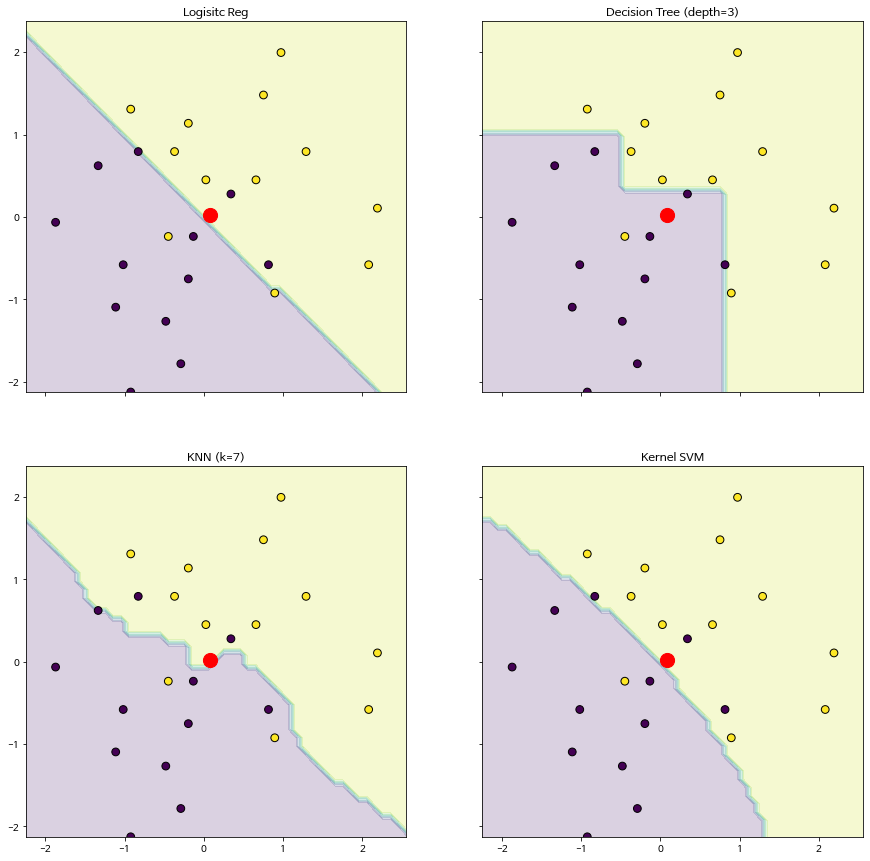

In [26]:
# 각 모형에 대한 분류 경계선 그림 그리기 
x_min, x_max = X_train[:, 0].min()*1.2, X_train[:, 0].max()*1.2
y_min, y_max = X_train[:, 1].min()*1, X_train[:, 1].max()*1.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex="col", sharey="row", figsize=(15, 15))

for idx, clf, tt in zip(
    product([0, 1], [0, 1]),
    [ model_logistic, model_tree, model_knn, model_svm],
    ["Logisitc Reg","Decision Tree (depth=3)", "KNN (k=7)", "Kernel SVM"],
):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.2)
    axarr[idx[0], idx[1]].scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=60, edgecolor="k")
    axarr[idx[0], idx[1]].set_title(tt)
    axarr[idx[0], idx[1]].scatter(x=0.079000, y=0.020608, color='r', s=200)

plt.show()

이제 4개의 적합된 모형으로 새로운 고객에 대한 예측을 수행해보자.  결정 나무 모형을 제외하고 모두 제초 트랙터를 구입할 것이리고 예측하였다.

예측은 적합된 모형에 `predict(x)` 메소드를 사용한다. 

In [27]:
# 새로운 고객에 대한 예측
y_pred_New = [model_logistic.predict(X_predict)[0], model_tree.predict(X_predict)[0], model_knn.predict(X_predict)[0], model_svm.predict(X_predict)[0] ]
df_new_pred = pd.DataFrame({'model': ["Logisitc","Decision Tree", "KNN", "Kernel SVM"], 'y_pred': y_pred_New})

df_new_pred

,model,y_pred
0,Logisitc,1.0
1,Decision Tree,0.0
2,KNN,1.0
3,Kernel SVM,1.0


참고로 결정 나무 모형에서 분류 절차를 시각화하면 다음과 같이 나타낼 수 있다.

- `X[0]` 는 'income`, 'X[1]` 은 `lotsize` 를 나타낸다.
- 상자 안에 맨 윗줄에 나온 조건이 만족하면 왼쪽 아래 상자로 이동한다. 이 경우가 $\hat y=0$ 으로 분류되는 것이다.
- 상자 안에 맨 윗줄에 나온 조건이 만족하지 않으면 오른쪽 아래 상자로 이동한다. 이 경우가 $\hat y=1$ 으로 분류되는 것이다.  
- 상자 안의 마지막에 `Value = [a,b]` 는 $\hat y=0$ 으로 분류된 레코드가 `a` 개, $\hat y=1$ 으로 분류된 레코드가 `b` 개라느 의미이다.

[Text(0.5, 0.875, 'X[0] <= -0.463\ngini = 0.5\nsamples = 24\nvalue = [12, 12]'),
 Text(0.25, 0.625, 'X[1] <= 1.051\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.125, 0.375, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.375, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.625, 'X[1] <= 0.364\ngini = 0.43\nsamples = 16\nvalue = [5, 11]'),
 Text(0.625, 0.375, 'X[0] <= 0.856\ngini = 0.494\nsamples = 9\nvalue = [5, 4]'),
 Text(0.5, 0.125, 'gini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.75, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.875, 0.375, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]')]

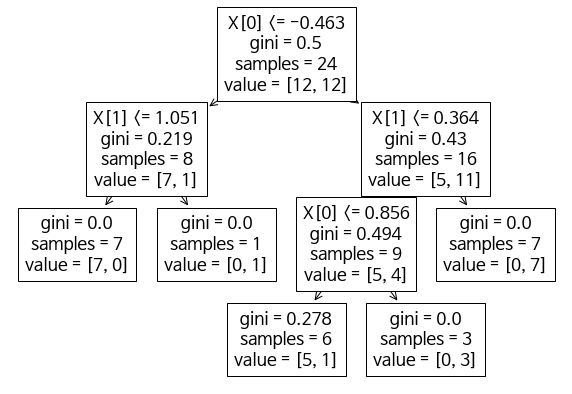

In [28]:
tree.plot_tree(model_tree)